# Most of the code in this notebook is from SCENIC tutorial:
https://scenicplus.readthedocs.io/en/latest/pbmc_multiome_tutorial.html#Note-on-the-output-of-SCENIC+

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#supress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import sys
import os
_stderr = sys.stderr
null = open(os.devnull,'wb')

In [ ]:
pip install scrublet scanpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.4/647.4 kB 53.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.0/103.0 kB 14.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 73.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 kB 9.6 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82830 sha256=f086d6c08aceb86c17c0a6df491cc719b8403fad1e97a1fbc96bd18d124aaf90
  Stored in directory: /root/.cache/pip/wheels/f4/3e/1c/596d0a463d17475af648688443fa4846fef624d139

In [ ]:
pip install leidenalg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 88.6 MB/s eta 0:00:00


In [ ]:
!mkdir -p pbmc_tutorial/data
!wget -O pbmc_tutorial/data/pbmc_granulocyte_sorted_3k_filtered_feature_bc_matrix.h5 https://cf.10xgenomics.com/samples/cell-arc/2.0.0/pbmc_granulocyte_sorted_3k/pbmc_granulocyte_sorted_3k_filtered_feature_bc_matrix.h5
!wget -O pbmc_tutorial/data/pbmc_granulocyte_sorted_3k_atac_fragments.tsv.gz https://cf.10xgenomics.com/samples/cell-arc/2.0.0/pbmc_granulocyte_sorted_3k/pbmc_granulocyte_sorted_3k_atac_fragments.tsv.gz

--2023-04-25 21:04:46--  https://cf.10xgenomics.com/samples/cell-arc/2.0.0/pbmc_granulocyte_sorted_3k/pbmc_granulocyte_sorted_3k_filtered_feature_bc_matrix.h5
Resolving cf.10xgenomics.com (cf.10xgenomics.com)... 104.18.1.173, 104.18.0.173, 2606:4700::6812:1ad, ...
Connecting to cf.10xgenomics.com (cf.10xgenomics.com)|104.18.1.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38844318 (37M) [binary/octet-stream]
Saving to: ‘pbmc_tutorial/data/pbmc_granulocyte_sorted_3k_filtered_feature_bc_matrix.h5’

pbmc_tutorial/data/ 100%[===================>]  37.04M  12.8MB/s    in 2.9s    

2023-04-25 21:04:50 (12.8 MB/s) - ‘pbmc_tutorial/data/pbmc_granulocyte_sorted_3k_filtered_feature_bc_matrix.h5’ saved [38844318/38844318]

--2023-04-25 21:04:50--  https://cf.10xgenomics.com/samples/cell-arc/2.0.0/pbmc_granulocyte_sorted_3k/pbmc_granulocyte_sorted_3k_atac_fragments.tsv.gz
Resolving cf.10xgenomics.com (cf.10xgenomics.com)... 104.18.1.173, 104.18.0.173, 2606:4700::6812

In [ ]:
import os
work_dir = 'pbmc_tutorial'

# scRNA-seq preprocessing using Scanpy

In [ ]:
import scanpy as sc
#set some figure parameters for nice display inside jupyternotebooks.
%matplotlib inline
sc.settings.set_figure_params(dpi=80, frameon=False, figsize=(5, 5), facecolor='white')

#make a directory for to store the processed scRNA-seq data.
if not os.path.exists(os.path.join(work_dir, 'scRNA')):
    os.makedirs(os.path.join(work_dir, 'scRNA'))

In [ ]:
adata = sc.read_10x_h5(os.path.join(work_dir, 'data/pbmc_granulocyte_sorted_3k_filtered_feature_bc_matrix.h5'))
adata.var_names_make_unique()
adata

/usr/local/lib/python3.9/dist-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 2711 × 36601
    var: 'gene_ids', 'feature_types', 'genome'

In [ ]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

In [ ]:
sc.external.pp.scrublet(adata) #estimates doublets

/usr/local/lib/python3.9/dist-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.24
Detected doublet rate = 2.6%
Estimated detectable doublet fraction = 54.3%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 4.8%


In [ ]:
adata = adata[adata.obs['predicted_doublet'] == False] #do the actual filtering
adata

View of AnnData object with n_obs × n_vars = 2630 × 21255
    obs: 'n_genes', 'doublet_score', 'predicted_doublet'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'
    uns: 'scrublet'

<ipython-input-17-bb0fd8cb5df3>:1: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'


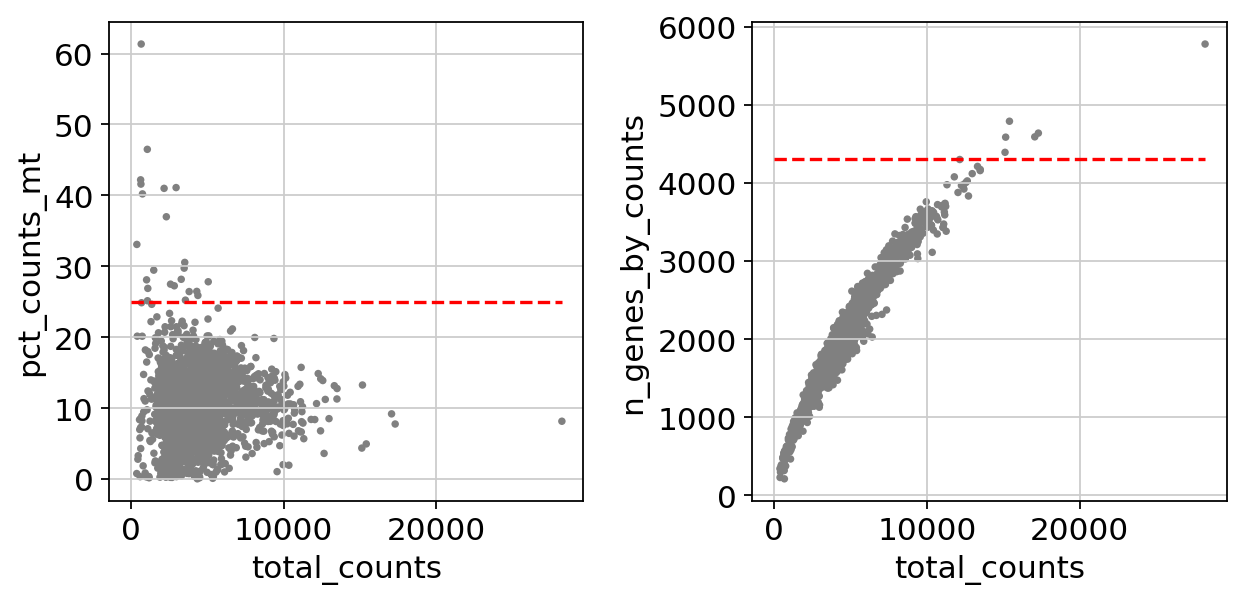

In [ ]:

adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
import matplotlib.pyplot as plt
mito_filter = 25
n_counts_filter = 4300
fig, axs = plt.subplots(ncols = 2, figsize = (8,4))
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt', ax = axs[0], show=False)
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts', ax = axs[1], show = False)
#draw horizontal red lines indicating thresholds.
axs[0].hlines(y = mito_filter, xmin = 0, xmax = max(adata.obs['total_counts']), color = 'red', ls = 'dashed')
axs[1].hlines(y = n_counts_filter, xmin = 0, xmax = max(adata.obs['total_counts']), color = 'red', ls = 'dashed')
fig.tight_layout()
plt.show()

In [ ]:
adata = adata[adata.obs.n_genes_by_counts < n_counts_filter, :]
adata = adata[adata.obs.pct_counts_mt < mito_filter, :]
adata

View of AnnData object with n_obs × n_vars = 2601 × 21255
    obs: 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'scrublet'

# Data Normalization

In [ ]:
adata.raw = adata
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata = adata[:, adata.var.highly_variable]
sc.pp.scale(adata, max_value=10)

/usr/local/lib/python3.9/dist-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


# Cell type annotation

In [ ]:
adata_ref = sc.datasets.pbmc3k_processed() #use the preprocessed data from the Scanpy tutorial as reference
var_names = adata_ref.var_names.intersection(adata.var_names) #use genes which are present in both assays
adata_ref = adata_ref[:, var_names]
adata = adata[:, var_names]
sc.pp.pca(adata_ref) #calculate PCA embedding
sc.pp.neighbors(adata_ref) #calculate neighborhood graph
sc.tl.umap(adata_ref) #calculate umap embedding
sc.tl.ingest(adata, adata_ref, obs='louvain') #run label transfer
adata.obs.rename({'louvain': 'ingest_celltype_label'}, inplace = True, axis = 1)

  0%|          | 0.00/23.5M [00:00<?, ?B/s]

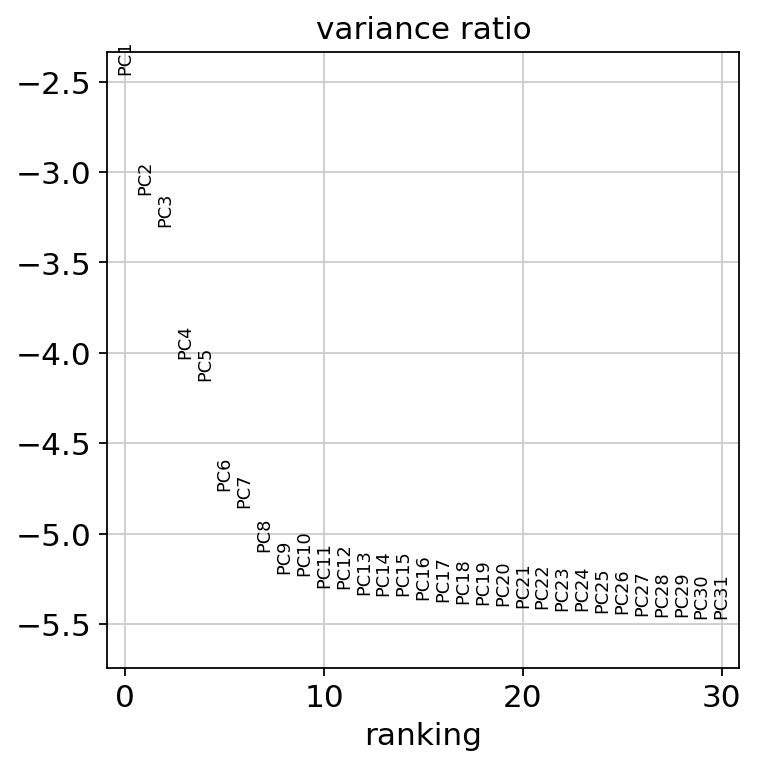

In [ ]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata, log=True)

/usr/local/lib/python3.9/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


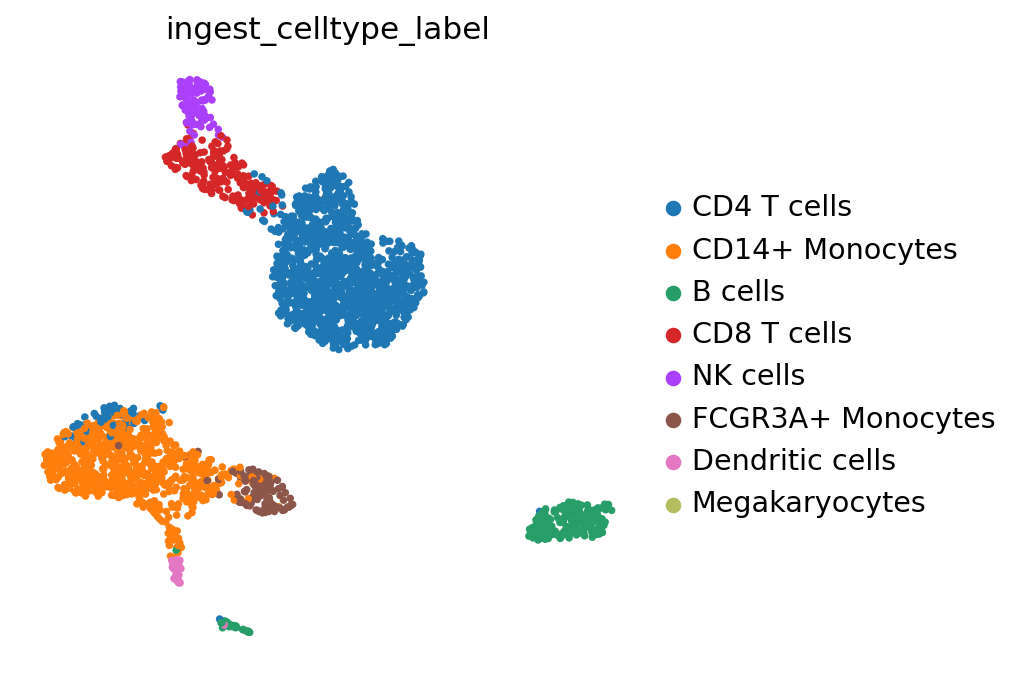

In [ ]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=10)
sc.tl.umap(adata)
sc.pl.umap(adata, color = 'ingest_celltype_label')

/usr/local/lib/python3.9/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


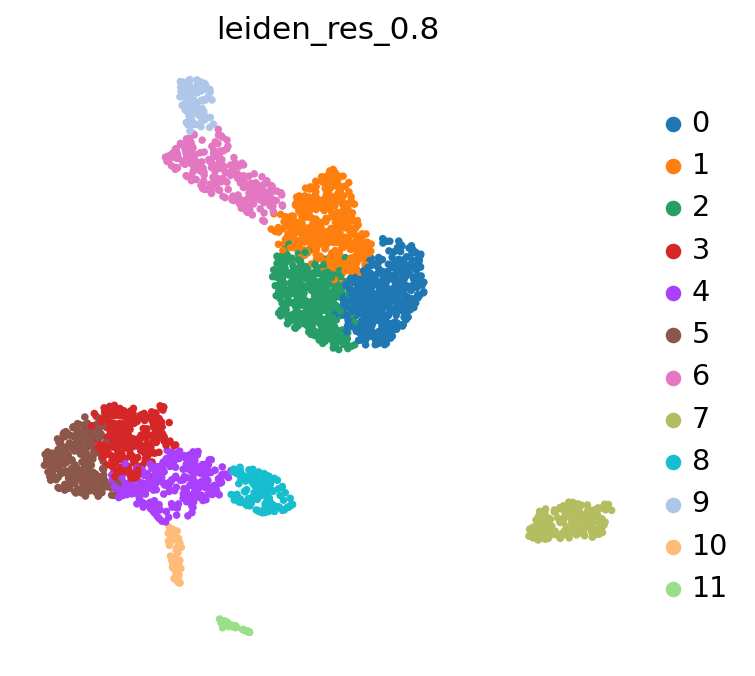

In [ ]:
sc.tl.leiden(adata, resolution = 0.8, key_added = 'leiden_res_0.8')
sc.pl.umap(adata, color = 'leiden_res_0.8')

In [ ]:
tmp_df = adata.obs.groupby(['leiden_res_0.8', 'ingest_celltype_label']).size().unstack(fill_value=0)
tmp_df = (tmp_df / tmp_df.sum(0)).fillna(0)
leiden_to_annotation = tmp_df.idxmax(1).to_dict()
leiden_to_annotation

{'0': 'CD4 T cells',
 '1': 'CD4 T cells',
 '2': 'CD4 T cells',
 '3': 'CD14+ Monocytes',
 '4': 'CD14+ Monocytes',
 '5': 'CD14+ Monocytes',
 '6': 'CD8 T cells',
 '7': 'B cells',
 '8': 'FCGR3A+ Monocytes',
 '9': 'NK cells',
 '10': 'Dendritic cells',
 '11': 'B cells'}

In [ ]:


leiden_to_annotation['7'] = 'B cells 1'
leiden_to_annotation['11'] = 'B cells 2'
leiden_to_annotation = {cluster: leiden_to_annotation[cluster].replace(' ', '_') for cluster in leiden_to_annotation.keys()}
leiden_to_annotation

{'0': 'CD4_T_cells',
 '1': 'CD4_T_cells',
 '2': 'CD4_T_cells',
 '3': 'CD14+_Monocytes',
 '4': 'CD14+_Monocytes',
 '5': 'CD14+_Monocytes',
 '6': 'CD8_T_cells',
 '7': 'B_cells_1',
 '8': 'FCGR3A+_Monocytes',
 '9': 'NK_cells',
 '10': 'Dendritic_cells',
 '11': 'B_cells_2'}

In [ ]:
adata.obs['celltype'] = [leiden_to_annotation[cluster_id] for cluster_id in adata.obs['leiden_res_0.8']]
del(leiden_to_annotation)
del(tmp_df)

/usr/local/lib/python3.9/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


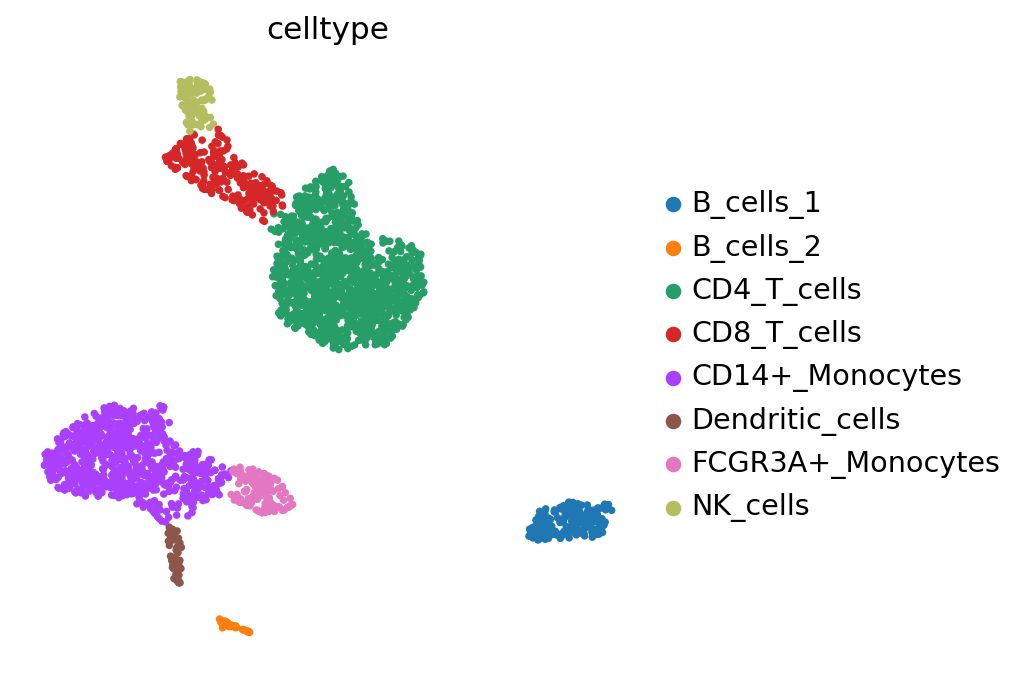

In [ ]:
sc.pl.umap(adata, color = 'celltype')

In [ ]:
adata.write(os.path.join(work_dir, 'scRNA/adata.h5ad'), compression='gzip')

In [ ]:
import pandas as pd
gene_by_cell = pd.DataFrame(adata.X.T, index=adata.var_names, columns=adata.obs_names)
gene_by_cell

,AAACAGCCAAATATCC-1,AAACAGCCAGGAACTG-1,AAACAGCCAGGCTTCG-1,AAACCAACACCTGCTC-1,AAACCAACAGATTCAT-1,AAACCAACAGTTGCGT-1,AAACCAACATAACGGG-1,AAACCAACATAGACCC-1,AAACCGCGTGAGGTAG-1,AAACGGATCCTAGTAA-1,...,TTTGCGACATGTCGCG-1,TTTGCGGAGCAGGTTT-1,TTTGCGGAGCGAAGTA-1,TTTGCGGAGGTCGATT-1,TTTGGCTGTTTACGTC-1,TTTGTGGCATCCGTAA-1,TTTGTGGCATTAGCCA-1,TTTGTGGCATTGCGAC-1,TTTGTGTTCCGCCTAT-1,TTTGTGTTCCGTGACA-1
TNFRSF4,4.227287,-0.179698,-0.179698,-0.179698,-0.179698,-0.179698,3.384590,-0.179698,-0.179698,-0.179698,...,-0.179698,-0.179698,-0.179698,-0.179698,-0.179698,-0.179698,-0.179698,-0.179698,-0.179698,-0.179698
UBIAD1,-0.245924,-0.245924,-0.245924,-0.245924,-0.245924,-0.245924,-0.245924,-0.245924,-0.245924,-0.245924,...,-0.245924,-0.245924,-0.245924,-0.245924,-0.245924,-0.245924,-0.245924,-0.245924,-0.245924,-0.245924
DRAXIN,10.000000,-0.077361,-0.077361,-0.077361,-0.077361,-0.077361,-0.077361,-0.077361,-0.077361,-0.077361,...,-0.077361,-0.077361,-0.077361,-0.077361,-0.077361,-0.077361,-0.077361,-0.077361,-0.077361,-0.077361
TNFRSF1B,1.429029,1.447505,0.676753,-0.793087,0.870200,-0.793087,1.934114,1.763727,-0.793087,-0.793087,...,-0.793087,-0.793087,-0.793087,-0.793087,-0.793087,-0.793087,-0.793087,0.468199,-0.793087,-0.793087
EFHD2,0.804060,1.390062,-0.676850,-0.676850,-0.676850,-0.676850,-0.676850,-0.676850,0.422561,-0.676850,...,-0.676850,-0.676850,-0.676850,-0.676850,-0.676850,-0.676850,-0.676850,1.917518,-0.676850,2.555333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TYMP,-0.841618,1.378685,0.637510,-0.841618,-0.841618,-0.841618,-0.114859,0.974000,0.182510,-0.841618,...,-0.841618,-0.841618,1.643340,1.100285,-0.841618,-0.841618,-0.841618,0.054033,-0.841618,-0.841618
MAP3K7CL,-0.272646,-0.272646,-0.272646,-0.272646,-0.272646,-0.272646,-0.272646,-0.272646,2.086109,-0.272646,...,-0.272646,-0.272646,-0.272646,-0.272646,-0.272646,-0.272646,-0.272646,-0.272646,-0.272646,-0.272646
BACH1,-0.843446,1.611453,-0.843446,1.412879,-0.843446,-0.843446,-0.843446,0.625166,-0.027944,1.759652,...,1.276336,-0.843446,1.311742,0.620217,-0.843446,1.265183,1.966972,0.251451,0.928746,-0.843446
BACE2,-0.139429,-0.139429,-0.139429,-0.139429,-0.139429,-0.139429,-0.139429,-0.139429,-0.139429,-0.139429,...,-0.139429,-0.139429,-0.139429,-0.139429,-0.139429,-0.139429,-0.139429,-0.139429,-0.139429,-0.139429


In [ ]:
gene_by_cell.to_csv(os.path.join(work_dir, 'gene_by_cell.csv'), index=True)